In [1]:
%display latex

In [2]:
%load_ext autoreload
%autoreload 2

Must modify the code in `rotations.py` directly to get change system dimension.

In [3]:
from rotations import *
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [2, 2]

In [4]:
F

Finite Field in x of size 2^3

In [5]:
BASIS

[x + 1, x^2 + x + 1, x^2 + 1]

In [6]:
# check that base is self-dual
for k in BASIS:
    for l in BASIS:
        if k == l:
            if (k * l).trace() != 1:
                raise Exception('Not self-dual!')
        else:
            if (k * l).trace() != 0:
                raise Exception('Not self-dual!')

Quick checking. First we verify that the rotation operators do indeed give us MUBs.

In [7]:
# Orthonormality
def isOrthonormal(m):
    return m.conjugate_transpose() * m == Id

# MUBs
def isMUB(m1, m2):
    m = (
        m1.conjugate_transpose() * m2
    ).apply_map(lambda t: abs(t)^2)
    return m == ones_matrix(2^N, 2^N) / (2^N)

def checkMUBs(mubs):
    if type(mubs) != list:
        mubs_list = []
        for i in range(2^N+1):
            mubs_list.append(mubs[(i*2^N):(i+1)*2^N,:])
    else:
        mubs_list = mubs
            
    for i in range(2^N+1):
        for j in range(2^N+1):
            if i == j:
                if not isOrthonormal(mubs_list[i]):
                    raise Exception(
                        'Encountered a basis that is not orthonormal!',
                        i
                    )
            else:
                if not isMUB(mubs_list[i], mubs_list[j]):
                    raise Exception(
                        'Encountered non-MUB pairs of basis!',
                        i, j
                    )
    return True

In [8]:
checkMUBs(mubs)

True

Now let's test the kernels.

In [16]:
# 'normalization'
op = zero_matrix(SR, 2^N, 2^N)
for a in F:
    for b in F:
        op += Delta(a, b)
op == Id * 2^N

True

In [17]:
# Covariance
D(x, x) * Delta(1, 1) * D(x, x).conjugate_transpose() == Delta(x+1,x+1)

True

In [20]:
# Hermitian for the appropriate phase
Delta(x^3,x) == Delta(x^3,x).conjugate_transpose()

True

In [21]:
# Hilbert-Schmidt orthonormality
(D(x^4,x^2) * D(x,x^2).conjugate_transpose()).trace()

0

Now we can use and test the actual Wigner function.

In [22]:
w = WignerMatrix(Proj(vector(V(F(1))[:,0])))
w # very slow using the displacement kernel

[  0   0   0   0   0   0   0 1/8]
[  0   0   0   0   0   0 1/8   0]
[  0   0   0   0   0 1/8   0   0]
[  0   0   0   0 1/8   0   0   0]
[  0   0   0 1/8   0   0   0   0]
[  0   0 1/8   0   0   0   0   0]
[  0 1/8   0   0   0   0   0   0]
[1/8   0   0   0   0   0   0   0]

Let's verify that the two kernels are equal.

In [23]:
# this takes a while 'cause SageMath is slow...
for k in F:
    for l in F:
        if Wootters(k,l) != Delta(k,l):
            raise Exception('Not the same!')

In [32]:
WignerMatrix(Proj(vector(mubs[-1][:,4])), kernel=Wootters)

[  0   0   0   0   0 1/8   0   0]
[  0   0   0 1/8   0   0   0   0]
[  0   0   0   0   0   0   0 1/8]
[1/8   0   0   0   0   0   0   0]
[  0   0   0   0   0   0 1/8   0]
[  0 1/8   0   0   0   0   0   0]
[  0   0 1/8   0   0   0   0   0]
[  0   0   0   0 1/8   0   0   0]

In [33]:
def eldiv(A, B):
    return A.parent()([a/b for a, b in zip(A.list(), B.list())])

In [34]:
# For the X operators we know that the 
# eigenbasis is the Fourier matrix.
s = zero_vector(SR, 2^N)
for k in F:
    s += sum(eldiv(D(0,k) * FF, FF)) / 2^N
s

(8, 0, 0, 0, 0, 0, 0, 0)

In [35]:
def findStabilizer(base, m):
    s = zero_vector(SR, 2^N)
    for k in F:
        s += sum(eldiv(D(k, m * k) * base, base)) / 2^N
    return s

In [42]:
findStabilizer(mubs[-1], F(1))

(8, 0, 0, 0, 0, 0, 0, 0)

Again the first vector of each base is a stabilizer state. For example consider the states associated to the diagonal line:
$$
\{Z_\alpha X_{\alpha}\}, \quad \alpha \in F.
$$
The rotation operators is $V_1$.

In [60]:
eldiv(D(x^6,x^6) * mubs[-1], mubs[-1])

[ 1 -1  1  1 -1  1 -1 -1]
[ 1 -1  1  1 -1  1 -1 -1]
[ 1 -1  1  1 -1  1 -1 -1]
[ 1 -1  1  1 -1  1 -1 -1]
[ 1 -1  1  1 -1  1 -1 -1]
[ 1 -1  1  1 -1  1 -1 -1]
[ 1 -1  1  1 -1  1 -1 -1]
[ 1 -1  1  1 -1  1 -1 -1]

In [132]:
ghz = vector(Id[:,0] + Id[:,-1])/sqrt(2)
w = WignerMatrix(Proj(ghz), kernel=Wootters).apply_map(lambda t: float(t))

In [133]:
wf = w.transpose()

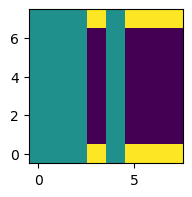

In [134]:
plt.imshow(wf, origin='lower')

In [137]:
w = WignerMatrix(Proj(vector(mubs[3][:,0])), kernel=Wootters).transpose()

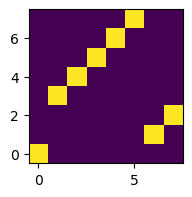

In [138]:
plt.imshow(w.apply_map(lambda t: float(t)), origin='lower')